In [1]:
from modnet.preprocessing import MODData
data=MODData.load('DATAFILES/matbench_perovskites_moddata.pkl.gz')

2022-12-12 14:27:37,159 - modnet - INFO - Loaded <modnet.preprocessing.MODData object at 0x7f42d8259700> object, created with modnet version 0.1.12


In [36]:
data.df_targets['e_form']

,e_form
id0,2.16
id1,1.52
id2,1.48
id3,1.24
id4,0.62
...,...
id18923,1.66
id18924,2.12
id18925,1.50
id18926,2.48


In [34]:
!ls

/bin/bash: /mnt/c/Users/roger/Documents/programas/UCLouvain/env_modnet/lib/libtinfo.so.6: no version information available (required by /bin/bash)
BaggingLR_OFM.ipynb	       OFM_customfeaturized18928.pkl
DATAFILES		       OFM_customfeaturized2000.pkl
Featurization		       OFM_customfeaturized3000.pkl
FeaturizingData.ipynb	       OFM_customfeaturized4000.pkl
OFMClusterModel		       OFM_customfeaturized5000.pkl
OFM_customfeaturized1000.pkl   OFM_customfeaturized6000.pkl
OFM_customfeaturized10000.pkl  OFM_customfeaturized7000.pkl
OFM_customfeaturized11000.pkl  OFM_customfeaturized8000.pkl
OFM_customfeaturized12000.pkl  OFM_customfeaturized9000.pkl
OFM_customfeaturized13000.pkl  README.md
OFM_customfeaturized14000.pkl  make_subsets_data.py
OFM_customfeaturized15000.pkl  noOFM
OFM_customfeaturized16000.pkl  run_benchmark.py
OFM_customfeaturized17000.pkl  withOFM
OFM_customfeaturized18000.pkl


In [ ]:
from matminer.featurizers.structure import OrbitalFieldMatrix
import pickle
featurizers=[OrbitalFieldMatrix(period_tag=False)]
for featurizer in featurizers:
    for idx in list(range(0,17000,1000)):
        featurizer=OrbitalFieldMatrix()
        featurizer.set_n_jobs(8)
        #data.df_structure=data.df_structure #.sample(n=10, random_state=1)
        print(idx,idx+1000)
        df_feat=featurizer.featurize_dataframe(data.df_structure[idx:idx+1000], 'structure',)
                                               #ignore_errors=True,return_errors=True)
        # save complete featurized dataframe
        pickle.dump(df_feat, open(f"OFM_customfeaturized{idx+1000}.pkl","wb"))

    df_feat=featurizer.featurize_dataframe(data.df_structure[17000:18000], 'structure',)
    # save complete featurized dataframe
    pickle.dump(df_feat, open(f"OFM_customfeaturized18000.pkl","wb"))
    df_feat=featurizer.featurize_dataframe(data.df_structure[18000:], 'structure',)
    # save complete featurized dataframe
    pickle.dump(df_feat, open(f"OFM_customfeaturized18928.pkl","wb"))

In [35]:
import pickle, glob
OFMs=[]
for idx in list(range(0,18000,1000))+[17928]:
    file=f"OFM_customfeaturized{idx+1000}.pkl"
    OFM=pickle.load(open(file,"rb"))
    OFMs.append(OFM)
    print(f"Loaded {file}.")
import pandas as pd
featurizedOFM=pd.concat(OFMs,axis=0)
featurizedOFM

Loaded OFM_customfeaturized1000.pkl.
Loaded OFM_customfeaturized2000.pkl.
Loaded OFM_customfeaturized3000.pkl.
Loaded OFM_customfeaturized4000.pkl.
Loaded OFM_customfeaturized5000.pkl.
Loaded OFM_customfeaturized6000.pkl.
Loaded OFM_customfeaturized7000.pkl.
Loaded OFM_customfeaturized8000.pkl.
Loaded OFM_customfeaturized9000.pkl.
Loaded OFM_customfeaturized10000.pkl.
Loaded OFM_customfeaturized11000.pkl.
Loaded OFM_customfeaturized12000.pkl.
Loaded OFM_customfeaturized13000.pkl.
Loaded OFM_customfeaturized14000.pkl.
Loaded OFM_customfeaturized15000.pkl.
Loaded OFM_customfeaturized16000.pkl.
Loaded OFM_customfeaturized17000.pkl.
Loaded OFM_customfeaturized18000.pkl.
Loaded OFM_customfeaturized18928.pkl.


,structure,species,OFM: s^1 - s^1,OFM: s^1 - s^2,OFM: s^1 - p^1,OFM: s^1 - p^2,OFM: s^1 - p^3,OFM: s^1 - p^4,OFM: s^1 - p^5,OFM: s^1 - p^6,...,OFM: f^14 - f^5,OFM: f^14 - f^6,OFM: f^14 - f^7,OFM: f^14 - f^8,OFM: f^14 - f^9,OFM: f^14 - f^10,OFM: f^14 - f^11,OFM: f^14 - f^12,OFM: f^14 - f^13,OFM: f^14 - f^14
id,,,,,,,,,,,,,,,,,,,,,
id0,"[[0. 0. 0.] Rh, [1.97726555 1.97726555 1.97726...",5,0.000000e+00,0.227089,0.0,0.0,0.227089,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
id1,"[[2.54041798 0. 0. ] Hf, [1.020...",5,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008017
id2,"[[0.60790913 0. 0. ] Re, [2.186...",5,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000475
id3,"[[2.83091357 0. 0. ] W, [2.6573...",5,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038130
id4,"[[0.00518937 0. 0. ] Bi, [2.172...",5,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id18923,"[[4.44077598 0. 0. ] Rb, [2.652...",5,2.440094e-07,0.184377,0.0,0.0,0.000000,0.181689,0.0,0.002688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
id18924,[[4.56913824e-03 7.21569024e-19 0.00000000e+00...,5,3.721372e-12,0.194835,0.0,0.0,0.064983,0.129850,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
id18925,"[[0.0040044 0. 0. ] Zn, [1.821570...",5,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


###  Lets find the optimal PCA components to represent the OFM data.

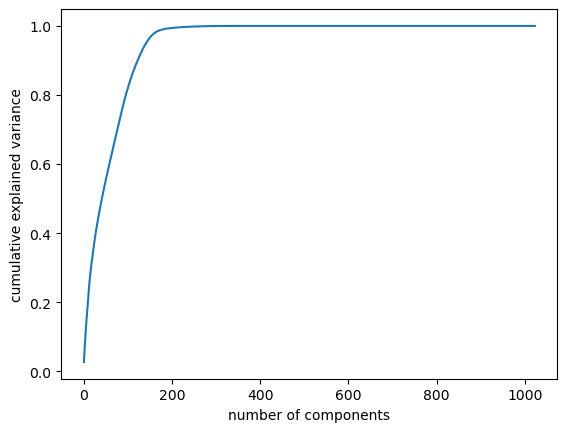

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Separating the features
X=featurizedOFM.drop(['species','structure'],axis=1)
Xcolumns=X.columns
# Standardizing the features
X = StandardScaler().fit_transform(X)
# Separating out the target ## !!! ideally I should implement this for the train set only. !!!
y = data.df_targets['e_form'] 

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### So around 200 components we have over 99% of the variance described.

In [50]:
np.cumsum(pca.explained_variance_ratio_)[200]

0.9941819169273535

In [77]:
n_components=200
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(X)
OFM_PC_df = pd.DataFrame(data = principalComponents
             , columns = [f'OFM|PC_{idx+1}' for idx in range(n_components) ])
OFM_PC_df

In [75]:
### we should save the OFM components to retrieve the chemical information in each PC
n_components=200
OFM_PCAcomponents = pd.DataFrame(pca.components_[:n_components], 
                                 columns=Xcolumns,
                                 index=[f'OFM|PC_{idx+1}' for idx in range(n_components)])
import pickle
pickle.dump(OFM_PCAcomponents,open("OFM_PCAcomponents.pkl","wb"))
OFM_PCAcomponents

In [5]:
!ls

/bin/bash: /mnt/c/Users/roger/Documents/programas/UCLouvain/env_modnet/lib/libtinfo.so.6: no version information available (required by /bin/bash)
BaggingLR_OFM.ipynb	       OFM_customfeaturized18928.pkl
DATAFILES		       OFM_customfeaturized2000.pkl
Featurization		       OFM_customfeaturized3000.pkl
FeaturizingData.ipynb	       OFM_customfeaturized4000.pkl
OFMClusterModel		       OFM_customfeaturized5000.pkl
OFM_PCAcomponents.pkl	       OFM_customfeaturized6000.pkl
OFM_customfeaturized1000.pkl   OFM_customfeaturized7000.pkl
OFM_customfeaturized10000.pkl  OFM_customfeaturized8000.pkl
OFM_customfeaturized11000.pkl  OFM_customfeaturized9000.pkl
OFM_customfeaturized12000.pkl  README.md
OFM_customfeaturized13000.pkl  ase_structures.pkl
OFM_customfeaturized14000.pkl  make_subsets_data.py
OFM_customfeaturized15000.pkl  noOFM
OFM_customfeaturized16000.pkl  run_benchmark.py
OFM_customfeaturized17000.pkl  withOFM
OFM_customfeaturized18000.pkl


In [64]:
## we still can access each component allowing to restore the original data
pca.components_[0].shape
# X.shape

(18928, 1024)

### Now to featurize with SOAP. I will try to make the columns a bit more meaningful.

In [30]:
import numpy as np
from dscribe.descriptors import SOAP
import pickle
import pymatgen
from pymatgen.io.ase import AseAtomsAdaptor
from ase.data import atomic_numbers
import os
import pandas as pd
structures=data.df_structure['structure']
try:
    structures_ase=pickle.load(open("ase_structures.pkl","rb"))
except:
    structures_ase=list(map(AseAtomsAdaptor.get_atoms,structures))
    pickle.dump(structures_ase,open("ase_structures.pkl","wb"))
    
## declaring the SOAP featurizer
species=list(atomic_numbers.keys())[1:] ## all chemical species
nmax=8
lmax=6
rcut=5
average_soap = SOAP(species=species,
rcut=rcut, nmax=nmax, lmax=lmax,
    average="inner",
    crossover=True,
    periodic=True,
    sparse=False
)
soap_results = average_soap.create(structures_ase[:3])
results=[]
for i in range(len(soap_results)):
    ## SOAP data is too large and sparse, its better to work with values and index
    results.append([soap_results[i][soap_results[i].nonzero()[0]],
                     soap_results[i].nonzero()[0]])
results
# type(results)
# results=pd.DataFrame.sparse.from_spmatrix(results)
# ncpus=os.cpu_count()
# ## this is very memory intensive has to be splitted
# slices=[None]+list(range(100,len(structures_ase),100))+[None]
# for i, slice1 in list(enumerate(slices))[:-1]:
#     results = average_soap.create(structures_ase[slice1:slices[i+1]], n_jobs=ncpus)
#     pickle.dump(results, open(f"SOAP_perovsk_featurized_{i}.pkl","wb"))
#     print(f"{i} out of {len(slices)-2} subsets to complete SOAP featurization")

[[array([ 0.00024594,  0.00463535, -0.00517914, ...,  0.00927274,
         -0.0251723 ,  0.06833416]),
  array([ 309288,  309289,  309290, ..., 2115117, 2115118, 2115119])],
 [array([ 0.00071318,  0.00778535, -0.0035089 , ...,  0.14981408,
         -0.13816099,  0.13395656]),
  array([ 359268,  359269,  359270, ..., 2626397, 2626398, 2626399])],
 [array([ 0.00041332,  0.00405851, -0.00116177, ...,  0.10758495,
         -0.08258327,  0.06553132]),
  array([ 359268,  359269,  359270, ..., 2687633, 2687634, 2687635])]]

In [31]:
np_results=np.array(results)
np_results

/tmp/ipykernel_16182/3537502687.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np_results=np.array(results)


array([[array([ 0.00024594,  0.00463535, -0.00517914, ...,  0.00927274,
               -0.0251723 ,  0.06833416])                              ,
        array([ 309288,  309289,  309290, ..., 2115117, 2115118, 2115119])],
       [array([ 0.00071318,  0.00778535, -0.0035089 , ...,  0.14981408,
               -0.13816099,  0.13395656])                              ,
        array([ 359268,  359269,  359270, ..., 2626397, 2626398, 2626399])],
       [array([ 0.00041332,  0.00405851, -0.00116177, ...,  0.10758495,
               -0.08258327,  0.06553132])                              ,
        array([ 359268,  359269,  359270, ..., 2687633, 2687634, 2687635])]],
      dtype=object)

In [32]:
np_results.shape

(3, 2)

In [22]:
results0=[results[0][results[0].nonzero()[0]],results[0].nonzero()[0]]
results[0]=np.array(results0)

ValueError: could not broadcast input array from shape (2,2100) into shape (3122280,)

## Now for the MEGNet

In [5]:
from megnet.utils.models import load_model, AVAILABLE_MODELS
from pymatgen.core import Structure, Lattice
from pymatgen.ext.matproj import MPRester
import numpy as np
from keras.models import Model
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
# print(AVAILABLE_MODELS)
def get_MEGNetFeaturesDF(structures):
    MEGNetFeats_structs=[]
    for model_name in ['Eform_MP_2019','Efermi_MP_2019','Bandgap_MP_2018','logK_MP_2019','logG_MP_2019']:
        model=load_model(model_name) 
        intermediate_layer_model = Model(inputs=model.input,
                             outputs=model.layers[-3].output)   
        MEGNetModel_structs=[]
        for s in structures:
            try:
                graph = model.graph_converter.convert(s)
                inp = model.graph_converter.graph_to_input(graph)
                pred = intermediate_layer_model.predict(inp, verbose=False)
                model_struct=pd.DataFrame([pred[0][0]], 
                                          columns=[f"MEGNet_{model_name}_{idx+1}" for idx in 
                                                   range(len(pred[0][0]))])
                MEGNetModel_structs.append(model_struct)
            except Exception as e:
                print(e)
                print("Probably an invalid structure was passed to the model, continuing..")
                model_struct=pd.DataFrame([np.nan]*32, 
                                          columns=[f"MEGNet_{model_name}_{idx+1}" for idx in 
                                                   range(len(pred[0][0]))])
                continue
        ## now append the columns with the layer of each model
        MEGNetModel_structs=pd.concat(MEGNetModel_structs,axis=0)
        MEGNetFeats_structs.append(MEGNetModel_structs)
        print(f"Features calculated for model {model_name}.")
    ## now every structure calculated with each model is combined in a final dataframe
    MEGNetFeats_structs=pd.concat(MEGNetFeats_structs,axis=1)
    return MEGNetFeats_structs

import pickle
structures=data.df_structure['structure']
slices=list(range(0,len(structures),1000))+[None]
for idx in range(len(slices)-1):
    print(f"Processing slice {idx+1} out of {len(slices)}")
    MEGNetFeats_struct=get_MEGNetFeaturesDF(structures[slices[idx]:slices[idx+1]])
    pickle.dump(MEGNetFeats_struct,open(f"MEGNetFeats_struct_slice{idx}.pkl", "wb"))
    del MEGNetFeats_struct ## free memory

# slices=list(range(0,len(structures),100))
# slices_range=slices+[None]
## lets save every 100 structures
# for i in range(len(slices)):
#     slice_1=slices_range[i]
#     slice_2=slices_range[i]
# MEGNetFeats_DF=[]

#     try:
#         MEGNetFeats_struct = get_MEGNetFeatures(s)
#         MEGNetFeats_DF.append(MEGNetFeats_struct)
#     except Exception as e:
#         print(e)
#         print("Invalid structure found.")
#         continue
#     ## assemble all samples together
# MEGNetFeats_struct=pd.concat(MEGNetFeats_DF,axis=0)
# MEGNetFeats_struct

# # train the model using valid graphs and targets
# model.train_from_graphs(graphs_valid, targets_valid)

Processing slice 1 out of 20


2022-12-12 14:58:41.560868: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-12 14:58:41.560921: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ROGERIO): /proc/driver/nvidia/version does not exist
2022-12-12 14:58:41.565090: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Features calculated for model Eform_MP_2019.
Features calculated for model Efermi_MP_2019.
Features calculated for model Bandgap_MP_2018.
Features calculated for model logK_MP_2019.
Features calculated for model logG_MP_2019.
Processing slice 2 out of 20
Features calculated for model Eform_MP_2019.
Features calculated for model Efermi_MP_2019.
Features calculated for model Bandgap_MP_2018.
Features calculated for model logK_MP_2019.
Features calculated for model logG_MP_2019.
Processing slice 3 out of 20
Features calculated for model Eform_MP_2019.
Features calculated for model Efermi_MP_2019.


Isolated atoms found in the structure. The cutoff radius might be small


Features calculated for model Bandgap_MP_2018.


Isolated atoms found in the structure. The cutoff radius might be small


Features calculated for model logK_MP_2019.


Isolated atoms found in the structure. The cutoff radius might be small


Features calculated for model logG_MP_2019.
Processing slice 4 out of 20
Features calculated for model Eform_MP_2019.
Features calculated for model Efermi_MP_2019.
Features calculated for model Bandgap_MP_2018.
Features calculated for model logK_MP_2019.
Features calculated for model logG_MP_2019.
Processing slice 5 out of 20
Features calculated for model Eform_MP_2019.
Features calculated for model Efermi_MP_2019.
Features calculated for model Bandgap_MP_2018.
Features calculated for model logK_MP_2019.


KeyboardInterrupt: 

In [2]:
!du -sh *


/bin/bash: /mnt/c/Users/roger/Documents/programas/UCLouvain/env_modnet/lib/libtinfo.so.6: no version information available (required by /bin/bash)
6.2M	BaggingLR_OFM.ipynb
120M	DATAFILES
2.4G	Featurization
120K	FeaturizingData.ipynb
640K	MEGNetFeats_struct_slice0.pkl
640K	MEGNetFeats_struct_slice1.pkl
640K	MEGNetFeats_struct_slice2.pkl
640K	MEGNetFeats_struct_slice3.pkl
8.0K	OFMClusterModel
1.6M	OFM_PCAcomponents.pkl
8.6M	OFM_customfeaturized1000.pkl
8.6M	OFM_customfeaturized10000.pkl
8.6M	OFM_customfeaturized11000.pkl
8.6M	OFM_customfeaturized12000.pkl
8.6M	OFM_customfeaturized13000.pkl
8.6M	OFM_customfeaturized14000.pkl
8.6M	OFM_customfeaturized15000.pkl
8.6M	OFM_customfeaturized16000.pkl
8.6M	OFM_customfeaturized17000.pkl
8.6M	OFM_customfeaturized18000.pkl
8.0M	OFM_customfeaturized18928.pkl
8.6M	OFM_customfeaturized2000.pkl
8.6M	OFM_customfeaturized3000.pkl
8.6M	OFM_customfeaturized4000.pkl
8.6M	OFM_customfeaturized5000.pkl
8.6M	OFM_customfeaturized6000.pkl
8.6M	OFM_customfeaturized

In [59]:
structures[:3]

id
id0    [[0. 0. 0.] Rh, [1.97726555 1.97726555 1.97726...
id1    [[2.54041798 0.         0.        ] Hf, [1.020...
id2    [[0.60790913 0.         0.        ] Re, [2.186...
Name: structure, dtype: object

In [56]:
MEGNetFeats_struct.filter(regex='_1$', axis=1)

,MEGNet_Eform_MP_2019_1,MEGNet_Efermi_MP_2019_1,MEGNet_Bandgap_MP_2018_1,MEGNet_logK_MP_2019_1,MEGNet_logG_MP_2019_1
0,13.070421,-0.667087,-0.693144,-0.682371,-0.468624
0,-0.678481,-0.621712,3.169754,-0.662625,-0.692508
0,1.650937,-0.602165,-0.692621,-0.659049,-0.686935
0,5.813663,-0.630605,-0.692974,-0.667284,-0.650627
0,-0.679549,-0.200709,0.145623,-0.527041,-0.692113
0,-0.688560,-0.693118,-0.685626,-0.690051,-0.419856
0,0.433677,1.804684,-0.423808,-0.303553,-0.661236
0,-0.685306,-0.692529,-0.693111,-0.663171,-0.579499
0,3.703247,-0.693141,-0.693145,-0.622793,-0.690080
0,-0.640070,-0.693147,-0.693147,-0.692486,-0.594721


In [45]:
structures[0:100]

id
id0     [[0. 0. 0.] Rh, [1.97726555 1.97726555 1.97726...
id1     [[2.54041798 0.         0.        ] Hf, [1.020...
id2     [[0.60790913 0.         0.        ] Re, [2.186...
id3     [[2.83091357 0.         0.        ] W, [2.6573...
id4     [[0.00518937 0.         0.        ] Bi, [2.172...
                              ...                        
id95    [[3.58528386e+00 3.71944048e+00 1.57916323e-14...
id96    [[0.00097358 0.         0.        ] Cd, [2.318...
id97    [[5.69205889e-03 0.00000000e+00 2.25789652e-18...
id98    [[1.09494106e+00 4.59999549e-11 1.34936202e-11...
id99    [[0. 0. 0.] Sn, [2.17447018 2.17447018 2.17447...
Name: structure, Length: 100, dtype: object

In [22]:
model.summary() 

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, None, 16)     1520        ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, None, 100)]  0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, None, 2)]    0           []                               
                                                                                            

 dense_14 (Dense)               (None, None, 32)     2080        ['dense_13[0][0]']               
                                                                                                  
 dense_16 (Dense)               (None, None, 32)     2080        ['dense_15[0][0]']               
                                                                                                  
 dense_18 (Dense)               (None, None, 32)     2080        ['dense_17[0][0]']               
                                                                                                  
 meg_net_layer_3 (MEGNetLayer)  [(None, None, 32),   39392       ['dense_14[0][0]',               
                                 (None, None, 32),                'dense_16[0][0]',               
                                 (1, None, 32)]                   'dense_18[0][0]',               
                                                                  'input_4[0][0]',                
          

In [28]:
#model.summary()
import numpy as np
s=data.df_structure['structure'][0]
from keras.models import Model

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-3].output)
print(intermediate_layer_model)
graph = model.graph_converter.convert(s)
inp = model.graph_converter.graph_to_input(graph)
pred = intermediate_layer_model.predict(inp, verbose=False)
pred
###intermediate_layer_model.input

#intermediate_output = intermediate_layer_model.predict(data)
#     tmp_output = tmp_model.predict_structure(s)[0]
#     layer_outputs.append(tmp_output)
# model.predict_structure(s).ravel()[0]
# model.predict_structure(s)
# model.layers[-3].output
# from keras import backend as K

# inp = model.input                                           # input placeholder
# outputs = [layer.output for layer in [model.layers[-3]]]          # all layer outputs
# functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions

# # Testing
# graph = model.graph_converter.convert(s)


# layer_outs = [func([graph]) for func in functors]
# call to fetch the activations of the model.
# activations = get_activations(model.predict_structure, s, auto_compile=True)
# activations
# from keras import backend as K
#from megnet.data.crystal import CrystalGraph
#from megnet.data.graph import GaussianDistance
#graph_converter=CrystalGraph(bond_converter=GaussianDistance(np.linspace(0, 5, 10), 0.5))

# from keract import get_activations
# s=model.graph_converter.convert(x)
# # with a Sequential model
# get_embedded_layer_output = K.function([model.layers[1].input],
#                                   [model.layers[-3].output])
# layer_output = get_3rd_layer_output([s])[0]
# layer_output

array([[[13.070421  , 10.564552  , -0.69314694, -0.6929809 ,
         -0.66214794,  1.9711747 , -0.63254917,  6.2008176 ,
         -0.6843377 , 23.616339  , -0.6931472 , -0.600617  ,
         -0.65579194, -0.6737697 ,  5.7335253 , -0.6930797 ,
         -0.6931466 , -0.6931472 , -0.69314706, -0.68076956,
          0.86391586, 11.924592  , -0.6044154 , -0.29584667,
         -0.6827061 , -0.6931448 , -0.6916665 , -0.6927845 ,
         -0.69311845, -0.6359574 , -0.69314694, -0.69314146]]],
      dtype=float32)

In [25]:
model.input

[<KerasTensor: shape=(None, None) dtype=int32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, None, 100) dtype=float32 (created by layer 'input_2')>,
 <KerasTensor: shape=(None, None, 2) dtype=float32 (created by layer 'input_3')>,
 <KerasTensor: shape=(None, None) dtype=int32 (created by layer 'input_4')>,
 <KerasTensor: shape=(None, None) dtype=int32 (created by layer 'input_5')>,
 <KerasTensor: shape=(None, None) dtype=int32 (created by layer 'input_6')>,
 <KerasTensor: shape=(None, None) dtype=int32 (created by layer 'input_7')>]

In [19]:
# #df_feat=featurizer.featurize_dataframe(data.df_structure.iloc[[5530]], 'structure')
# #df_feat, 
# def nspec(x):
#     return len(x.species)
# data.df_structure['species']= data.df_structure['structure'].apply(nspec) #.iloc[5530].values[0].species
# data.df_structure['species'].sort_values()

In [52]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data.df_structure.iloc[5529]['structure']


Structure Summary
Lattice
    abc : 3.930170626613603 3.930170626613603 3.930170626613603
 angles : 90.0 90.0 90.0
 volume : 60.706363276205764
      A : 3.930170626613603 0.0 0.0
      B : 0.0 3.930170626613603 0.0
      C : 0.0 0.0 3.930170626613603
PeriodicSite: Ta (2.6090, 3.9302, 0.0000) [0.6638, 1.0000, 0.0000]
PeriodicSite: Ga (0.0259, 1.9651, 1.9651) [0.0066, 0.5000, 0.5000]
PeriodicSite: N (3.5263, 3.9302, 1.9651) [0.8972, 1.0000, 0.5000]
PeriodicSite: N (3.5263, 1.9651, 3.9302) [0.8972, 0.5000, 1.0000]
PeriodicSite: N (1.9054, 1.9651, 1.9651) [0.4848, 0.5000, 0.5000]

,1
1,NaN


In [20]:
unique=np.array([112,313,145,222,233])
ex0=np.array([0.2,0.5])
ex=np.array([112,145])
zeros=np.zeros(len(unique))

toinsert=np.nonzero(np.in1d(unique,ex))[0]
unique,ex,ex0,zeros,toinsert
zeros[toinsert]=ex0

In [21]:
zeros

array([0.2, 0. , 0.5, 0. , 0. ])

In [22]:
SOAP_matrix=np.array([])

In [31]:
x = np.zeros([251340,100])

In [32]:
x.nbytes/1000


201072.0